# پروژه رگرسیون Regression

برای این پروژه ما اطلاعات تقریبا ۴۰۰۰ آپارتمان در تهران را تهیه کرده ایم. تمامی داده ها کاملا واقعی هستند. وظیفه شما این است که با استفاده از ویژگی های دیتاست که در ادامه به تشریح آنها پرداخته‌ایم قیمت به دلار یا تومان را تخمین بزنید. داده ها درون فایل housePrice.csv ذخیره شده اند.

-  متراژ خانه به متر (Area)
- تعداد اتاق خواب (Room)
- پارکینگ دارد یا خیر (Parking)
- انباری دارد یا خیر (Warehouse)
- آسانسور دارد یا خیر (Elevator)
- آدرس حدودی در تهران (Address)
- قیمت به تومان (Price)
- قیمت به دلار (Price(USD))

در این دیتاست بعضی از خانه ها آدرس ندارند و همینطور متراژ بعضی از خانه ها اشتباه وارد شده (مقدار بسیار بزرگی دارند). به این منظور این موارد را نیز باید مدیریت کنید و آن ها را از دیتاست خود حذف کنید.

 

In [13]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import r2_score
from plotnine import * # ggplot


In [22]:
df = pd.read_csv("./housePrice.csv")
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [23]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


,variable,value
0,Area,63
1,Area,60
2,Area,79
3,Area,95
4,Area,123
...,...,...
27827,Price(USD),116666.67
27828,Price(USD),226666.67
27829,Price(USD),12166.67
27830,Price(USD),186666.67


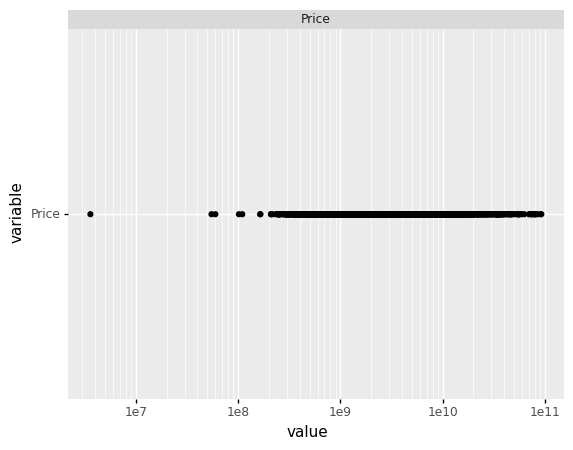

<ggplot: (8782091503388)>

In [41]:
(
    ggplot(pd.melt(df[['Price']])) + 
    aes(x = 'value', y = 'variable') +
    geom_point() +
    facet_wrap('variable') +
    scale_x_log10()
)

In [26]:
nan_address = df.Address == np.NaN

df[]

0       False
1       False
2       False
3       False
4       False
        ...  
3474    False
3475    False
3476    False
3477    False
3478    False
Name: Address, Length: 3479, dtype: bool